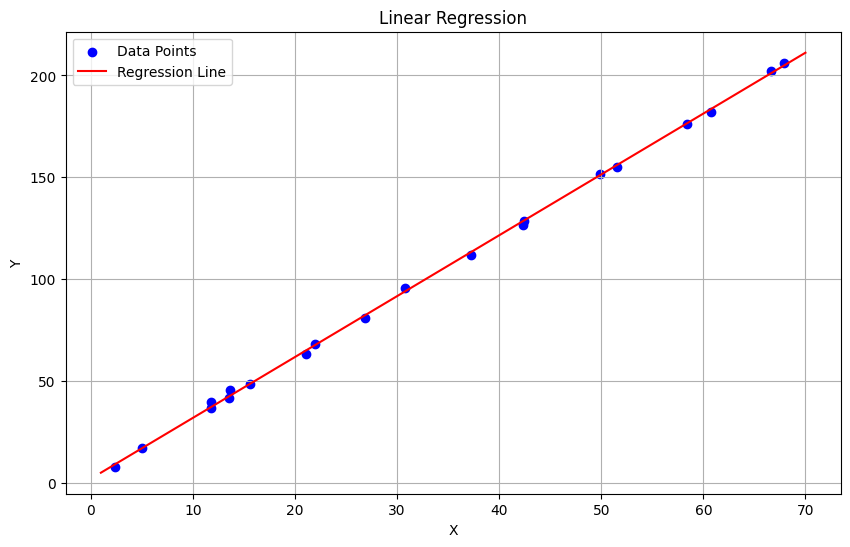

Residual Analysis:


,X,Y,Y_pred,Residuals,Standardized Residuals
0,26.843268,81.010558,82.185018,-1.174460,-0.889163
1,66.599287,202.269232,201.006653,1.262579,0.955876
2,51.507582,155.160710,155.901003,-0.740293,-0.560463
3,42.307435,126.803851,128.403872,-1.600021,-1.211348
4,11.765286,39.494332,37.120383,2.373949,1.797276
5,11.763622,36.952201,37.115408,-0.163207,-0.123561
6,5.007769,17.124600,16.923712,0.200888,0.152089
7,60.766154,182.161340,183.572755,-1.411415,-1.068557
8,42.476936,128.614233,128.910470,-0.296236,-0.224275
9,49.857008,151.737407,150.967815,0.769593,0.582645


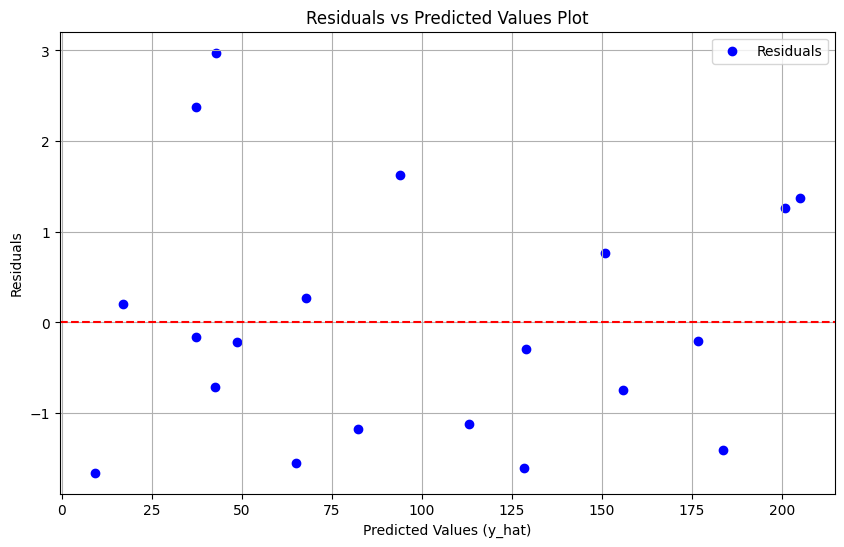

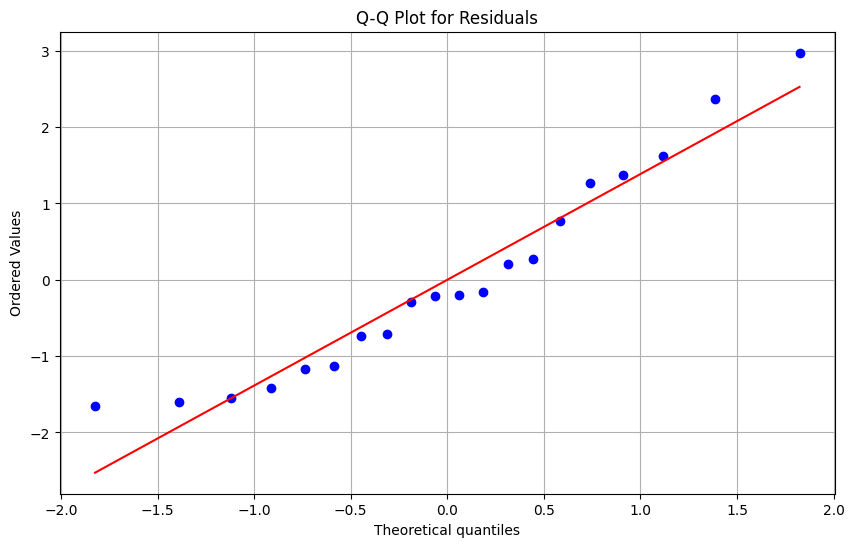

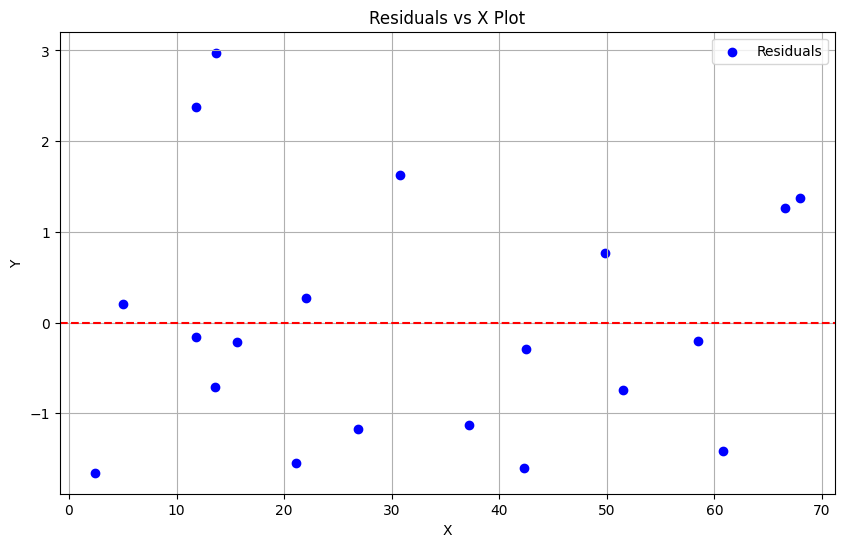

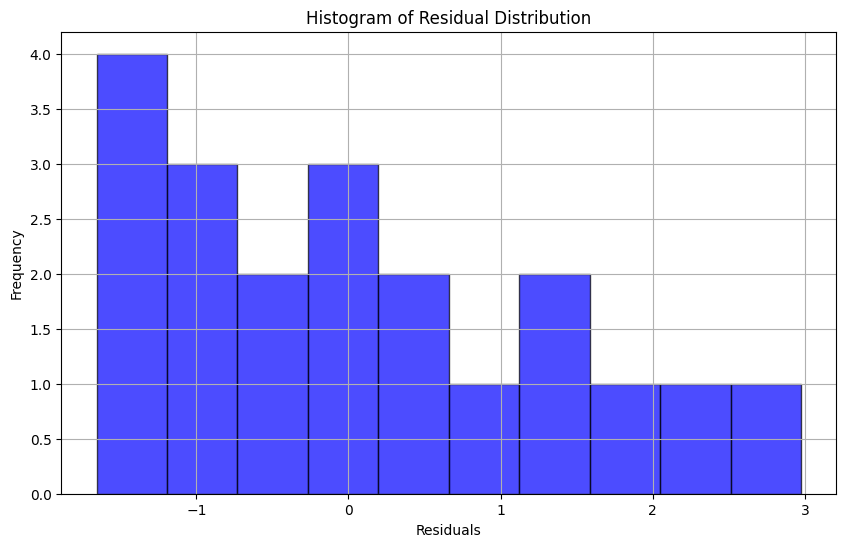

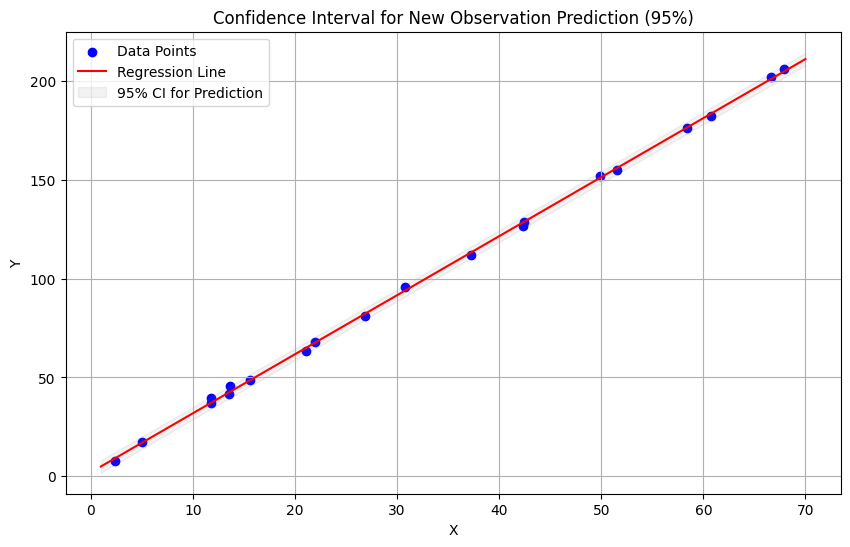

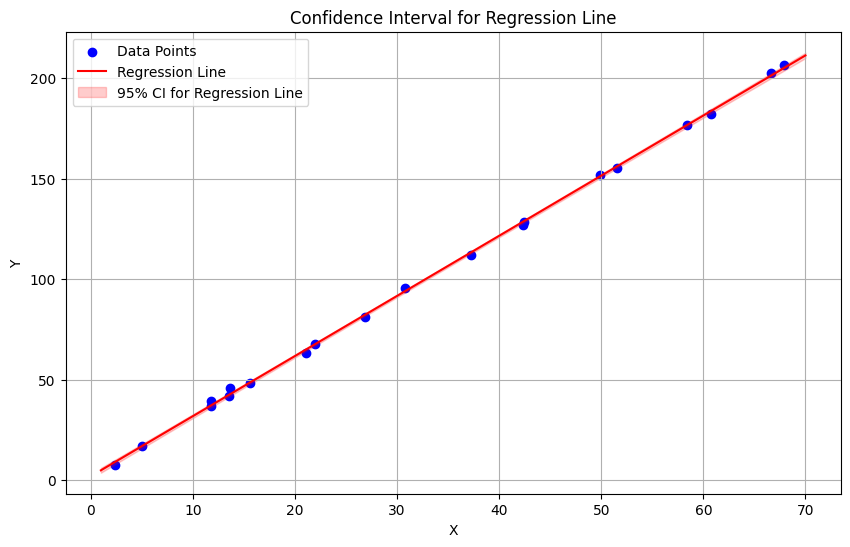

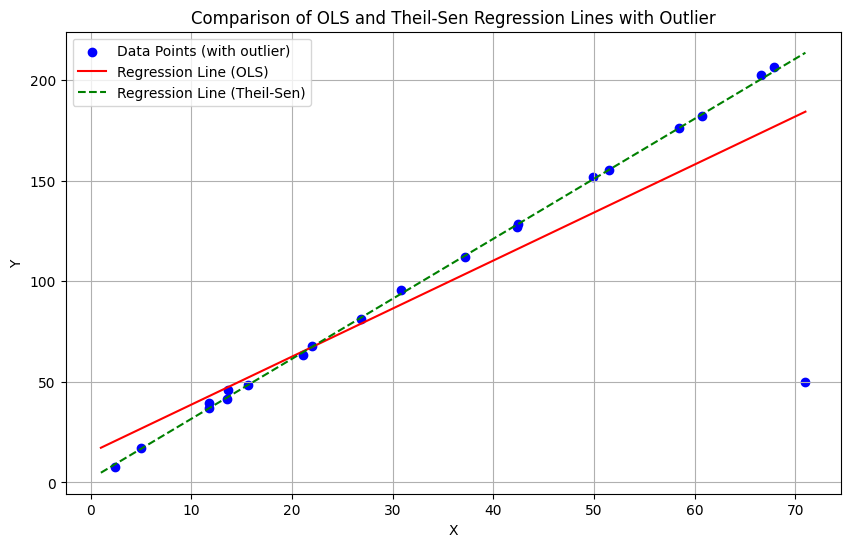

OLS estimates without outlier:
a_hat = 1.9566, b_hat = 2.9888
R-squared = 0.9995

Parameter significance:
a_hat: t = 3.3694, p = 0.0034
b_hat: t = 198.6516, p = 0.0000

Model adequacy test (F-test):
F-statistic = 39462.4416, p = 0.0000

Comparison with outlier:
      Method      a_hat     b_hat  delta_a (%)  delta_b (%)
0        OLS  14.871341  2.386293   643.567031     20.45690
1  Theil-Sen   1.874676  2.981864     6.266211      0.60452

Conclusions:
The Theil-Sen method is more robust to outliers than OLS, as it demonstrates smaller relative errors in the presence of an outlier point.
The model is adequate if the p-value of the F-test < 0.05, which indicates the significance of the regression.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from IPython.display import display  # For displaying tables in Colab

# Step 1: Data Generation
np.random.seed(42)  # For reproducibility
N = 20
x_min, x_max = 1, 70
a_true, b_true = 2, 3
sigma = 1.5

# 1.2 Generate X (uniform distribution)
X = np.random.uniform(x_min, x_max, N)

# 1.4 Generate error (normal distribution)
epsilon = np.random.normal(0, sigma, N)

# 1.5 Generate Y
Y = a_true + b_true * X + epsilon

# Step 2: Linear Regression (OLS)
# 2.1 Estimate parameters a_hat and b_hat
x_mean = np.mean(X)
y_mean = np.mean(Y)
b_hat = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
a_hat = y_mean - b_hat * x_mean

# 2.2 Plot: data points + regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
x_line = np.linspace(x_min, x_max, 100)
y_line = a_hat + b_hat * x_line
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Model Quality Analysis
# 3.1 Coefficient of determination (R-squared)
y_pred = a_hat + b_hat * X
ss_tot = np.sum((Y - y_mean)**2)
ss_res = np.sum((Y - y_pred)**2)
R2 = 1 - ss_res / ss_tot

# 3.2 Parameter significance
n = len(X)
s2 = ss_res / (n - 2)
s = np.sqrt(s2)
s_b = s / np.sqrt(np.sum((X - x_mean)**2))
s_a = s * np.sqrt(np.sum(X**2) / (n * np.sum((X - x_mean)**2)))
t_b = b_hat / s_b
t_a = a_hat / s_a
p_b = 2 * (1 - stats.t.cdf(abs(t_b), df=n-2))
p_a = 2 * (1 - stats.t.cdf(abs(t_a), df=n-2))

# 3.3 Residual analysis
residuals = Y - y_pred
residuals_std = np.std(residuals)
residuals_analysis = pd.DataFrame({
    'X': X,
    'Y': Y,
    'Y_pred': y_pred,
    'Residuals': residuals,
    'Standardized Residuals': residuals / residuals_std
})

# Display residual analysis in Colab
print("Residual Analysis:")
display(residuals_analysis)

# Additional plots for residual analysis
# Residuals vs predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values (y_hat)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values Plot')
plt.legend()
plt.grid(True)
plt.show()

# Q-Q plot for checking residual normality
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.grid(True)
plt.show()

# Residuals vs X plot
plt.figure(figsize=(10, 6))
plt.scatter(X, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Residuals vs X Plot')
plt.legend()
plt.grid(True)
plt.show()

# Histogram of residual distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residual Distribution')
plt.grid(True)
plt.show()

# 3.4 Confidence interval for new observation prediction (probability 0.95)
t_val = stats.t.ppf(0.975, df=n-2)
x_new = np.linspace(x_min, x_max, 100)
y_new = a_hat + b_hat * x_new
s_pred = s * np.sqrt(1 + 1/n + (x_new - x_mean)**2 / np.sum((X - x_mean)**2))
ci_pred_lower = y_new - t_val * s_pred
ci_pred_upper = y_new + t_val * s_pred

# Plot confidence interval for new observation prediction
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(x_new, y_new, color='red', label='Regression Line')
plt.fill_between(x_new, ci_pred_lower, ci_pred_upper, color='gray', alpha=0.1, label='95% CI for Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Confidence Interval for New Observation Prediction (95%)')
plt.legend()
plt.grid(True)
plt.show()

# 3.5 Confidence interval for regression line y(x) = a + bx with estimate y_hat(x) = a_hat + b_hat*x
s_line = s * np.sqrt(1/n + (x_new - x_mean)**2 / np.sum((X - x_mean)**2))
ci_line_lower = y_new - t_val * s_line
ci_line_upper = y_new + t_val * s_line

# Plot confidence interval for regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(x_new, y_new, color='red', label='Regression Line')
plt.fill_between(x_new, ci_line_lower, ci_line_upper, color='red', alpha=0.2, label='95% CI for Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Confidence Interval for Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# 3.6 Model adequacy test (F-test)
ss_reg = np.sum((y_pred - y_mean)**2)
df_reg = 1  # Degrees of freedom for regression (1 variable X)
df_res = n - 2  # Degrees of freedom for residuals
ms_reg = ss_reg / df_reg
ms_res = ss_res / df_res
f_stat = ms_reg / ms_res
p_f = 1 - stats.f.cdf(f_stat, df_reg, df_res)

# Step 4: Adding an outlier
# 4.1 Add a strong outlier point
X_outlier = np.append(X, x_max + 1)  # X = 71
Y_outlier = np.append(Y, 50)  # Y value = 50, which significantly deviates from expected (~215)

# 4.2 OLS with outlier
x_mean_out = np.mean(X_outlier)
y_mean_out = np.mean(Y_outlier)
b_hat_out = np.sum((X_outlier - x_mean_out) * (Y_outlier - y_mean_out)) / np.sum((X_outlier - x_mean_out)**2)
a_hat_out = y_mean_out - b_hat_out * x_mean_out

# 4.2 Theil-Sen estimator
def theil_sen(X, Y):
    n = len(X)
    slopes = []
    for i in range(n):
        for j in range(i+1, n):
            if X[j] != X[i]:
                slopes.append((Y[j] - Y[i]) / (X[j] - X[i]))
    b_ts = np.median(slopes)
    intercepts = Y - b_ts * X
    a_ts = np.median(intercepts)
    return a_ts, b_ts

a_ts, b_ts = theil_sen(X_outlier, Y_outlier)

# Plot comparing OLS and Theil-Sen
plt.figure(figsize=(10, 6))
plt.scatter(X_outlier, Y_outlier, color='blue', label='Data Points (with outlier)')
x_line_out = np.linspace(x_min, x_max + 1, 100)
y_line_mnk = a_hat_out + b_hat_out * x_line_out
y_line_ts = a_ts + b_ts * x_line_out
plt.plot(x_line_out, y_line_mnk, color='red', label='Regression Line (OLS)')
plt.plot(x_line_out, y_line_ts, color='green', linestyle='--', label='Regression Line (Theil-Sen)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of OLS and Theil-Sen Regression Lines with Outlier')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Results Comparison
# 5.1 Relative errors
delta_a_ols = abs((a_true - a_hat_out) / a_true) * 100
delta_b_ols = abs((b_true - b_hat_out) / b_true) * 100
delta_a_ts = abs((a_true - a_ts) / a_true) * 100
delta_b_ts = abs((b_true - b_ts) / b_true) * 100

# 5.2 Comparison table
results = pd.DataFrame({
    'Method': ['OLS', 'Theil-Sen'],
    'a_hat': [a_hat_out, a_ts],
    'b_hat': [b_hat_out, b_ts],
    'delta_a (%)': [delta_a_ols, delta_a_ts],
    'delta_b (%)': [delta_b_ols, delta_b_ts]
})

# Display results
print("OLS estimates without outlier:")
print(f"a_hat = {a_hat:.4f}, b_hat = {b_hat:.4f}")
print(f"R-squared = {R2:.4f}")
print("\nParameter significance:")
print(f"a_hat: t = {t_a:.4f}, p = {p_a:.4f}")
print(f"b_hat: t = {t_b:.4f}, p = {p_b:.4f}")
print("\nModel adequacy test (F-test):")
print(f"F-statistic = {f_stat:.4f}, p = {p_f:.4f}")
print("\nComparison with outlier:")
print(results)
print("\nConclusions:")
print("The Theil-Sen method is more robust to outliers than OLS, as it demonstrates smaller relative errors in the presence of an outlier point.")
print("The model is adequate if the p-value of the F-test < 0.05, which indicates the significance of the regression.")